

*   For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

* It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.



1.   Problem (case study)


*  Data Description.
*  Goal.


2.   Getting Data


*   Read the .csv file.

3. Cleaning/Wrangling/EDA


*   Change headers names.
* Deal with NaN values.
* Categorical Features.
* Numerical Features.
* Exploration.






In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
def fromCSVToDF(path):
  data=pd.read_csv(path)
  return data

In [ ]:
data = fromCSVToDF('marketing_customer_analysis.csv')
data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
data['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [ ]:
if data.columns.duplicated().any():
    print("Hay columnas repetidas.")
else:
    print("No hay columnas repetidas.")

No hay columnas repetidas.


In [ ]:
data_cat=data.select_dtypes(include=['object'])
data_cat


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
data_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [ ]:
nulos1=data_cat.columns[data_cat.isnull().any()].tolist()
nulos1


[]

In [ ]:
data_numerical= data.select_dtypes(exclude=["object"])
data_numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [ ]:
nulos2=data_numerical.columns[data_numerical.isnull().any()].tolist()
nulos2

[]

In [ ]:
corr_matrix=data_numerical.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


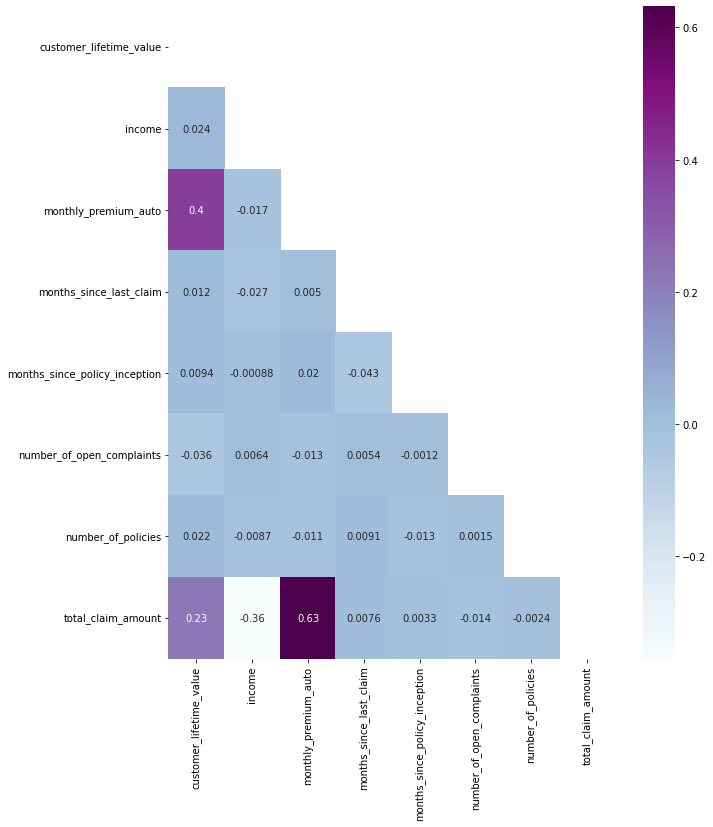

In [ ]:
mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,12))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='BuPu')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [ ]:
X_num=data_numerical[[ 'income', 'monthly_premium_auto']]
X_cat=data_cat

y=data['total_claim_amount']


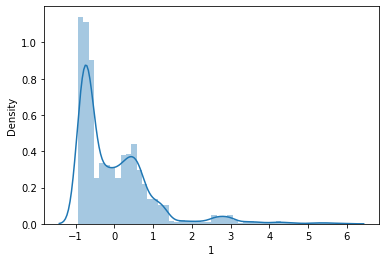

In [ ]:
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)
x_stan_df=pd.DataFrame(x_stan)

sns.distplot(x_stan_df[1])

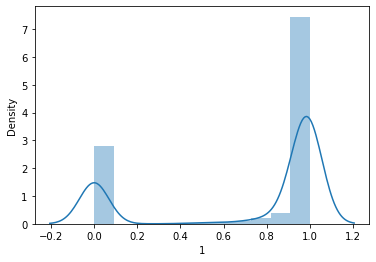

In [ ]:
transformer=Normalizer().fit(X_num)
x_norm=transformer.transform(X_num)

x_norm_df=pd.DataFrame(x_norm)

sns.distplot(x_norm_df[1])


0


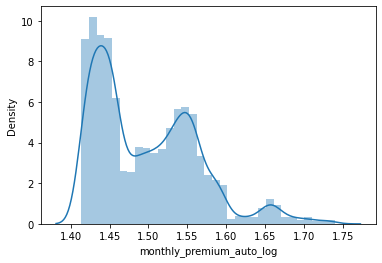

In [ ]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
  
          return np.NAN # We are returning NaNs so that we can replace them with means later

data['monthly_premium_auto_log'] = list(map(log_transfom_clean_, data['monthly_premium_auto']))
print(sum(data['monthly_premium_auto_log'].isnull()))
data['monthly_premium_auto_log'] = data['monthly_premium_auto_log'].fillna(np.mean(data['monthly_premium_auto_log']))
sns.distplot(data['monthly_premium_auto_log'])
plt.show()



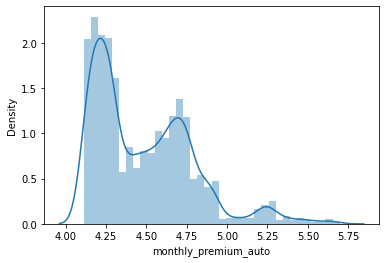

In [ ]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
# upper_limit = np.percentile(data['IC3_log'],75) + 1.5*iqr
# lower_limit = np.percentile(data['IC3_log'],25) - 1.5*iqr
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 3*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 3*iqr
data = data[(data['monthly_premium_auto']>lower_limit) & (data['monthly_premium_auto']<upper_limit)]
sns.distplot(data['monthly_premium_auto'])
plt.show()

In [ ]:
#Trasnf de boxcox
from scipy import stats
data['IC5_'] = np.where(data['IC5']<=0,0,data['IC5'])
mean = np.sum(data['IC5_'])/len(data[data['IC5_']>0])
# -5,8,9,7
# 0,8,9,7 mean=(7+9+8+0)/3
#BoxCox va a buscar alguna modificación de la forma y^lambda que mejor se ajuste a una distr normal
data['IC5_'] = data['IC5_'].replace(0,mean)
data = data.drop(['IC5'], axis=1)
xt2, lmbda = stats.boxcox(data['IC5_'])
#xt2 aún no es parte del database "completo", necesito crearle la columna con su propio nombre
#para añadirla
data['IC5_BC']=xt2
sns.distplot(xt2)

In [ ]:
#ahora vamos a tratar la data categórica, i.e. pasarlo a numérico
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [ ]:
X=np.concatenate((encoder, x_stan), axis=1)
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.61282744, -0.70392465],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.23961684,  0.02269103],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.36570978,  0.42959581],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.23961684, -0.23889062],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.51735647,  0.08082028],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.23961684, -0.47140763]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn import linear_model
lm=linear_model.LinearRegression()

In [ ]:
model=lm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predictions=lm.predict(X_test)
r2_score(y_test,predictions)

0.7617810389713633